In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(-0.5, 707.5, 387.5, -0.5)

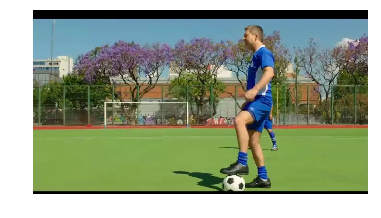

In [24]:
imagen = cv2.imread("img/5.jpg")
rgb= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
hsv= cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
plt.imshow(rgb)
plt.axis('off')

True

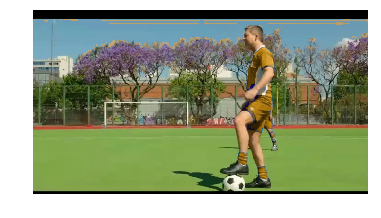

In [34]:
# Cambiando solo un segmento de color usando where
h,s,v = cv2.split(hsv)

h=np.where((h>=102) & (h<=120),200,h)

nuevo_hsv=cv2.merge([h,s,v])
nuevo_rgb= cv2.cvtColor(nuevo_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(nuevo_rgb)
plt.axis('off')

# guardar imagen transformada
nuevo_bgr= cv2.cvtColor(nuevo_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite('result/camiseta.png', nuevo_bgr)

In [27]:
video= cv2.VideoCapture('video/tafirol.mp4')

fps=video.get(cv2.CAP_PROP_FPS)
codec =cv2.VideoWriter_fourcc(*'XVID')
size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
nuevoVideo= cv2.VideoWriter('result/tafirol.mp4',codec,fps,size)  

i=0
success, frame2 = video.read()
while success:
    i+=1
    hsv2= cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv2)
    h=np.where((h>=103) & (h<=130),200,h)
    nuevo_hsv=cv2.merge([h,s,v])
    nuevo_rgb= cv2.cvtColor(nuevo_hsv, cv2.COLOR_HSV2RGB)
    nuevo_bgr= cv2.cvtColor(nuevo_rgb, cv2.COLOR_RGB2BGR)
    if (i>52) and (i<394):
        nuevoVideo.write(nuevo_bgr)
    # cv2.imwrite('frames/camiseta'+str(i)+'.png', nuevo_bgr)
    success, frame2 = video.read()
print(i)
    
video.release()
nuevoVideo.release()

465
